# Import Modules

In [1]:
import os
import pandas as pd
import numpy.random as rnd
from dotenv import load_dotenv
import requests
import warnings
import json
import sqlalchemy as sql
from pathlib import Path
import datetime
import yfinance as yf
warnings.filterwarnings('ignore')

warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.4%}'.format

# Client Input Module

In [2]:
#### Function to assess client risk profile
from clientprofile.client_risk_profile import client_risk_tolerance
client_risk = client_risk_tolerance()
print(f'Your risk factor is {client_risk}')
#type(client_risk)

A. On a scale of 1(Risky Avoidant) - 4(Risky), how would your closest friend describe your risk tolerance? 4
B. On a scale of 1(Risky Avoidant) - 4(Risky), how would you describe your risk tolerance? 3
C. What would you rather:1. Take $1,000 in cash  2. A 50% chance at winning $5,000  3. A 25% chance at winning $10,000  4. A 5% chance at winning $100,000   4
D. Define risk: 1. Loss 2. Uncertainty 3. Opportunity 4. Thrill  4
E. How comfortable on a scale of 1(Not Comfortable) - 4(Very Comfortable)are you with investing your money into stocks? 4


Your risk factor is 0.95


In [3]:
print(client_risk)

0.95


In [4]:
#### Client input for their investment horizon. 
investment_timeframe = input("What is the desired timeframe(in # of years) for your investment?")
investment_timeframe = float(investment_timeframe)

What is the desired timeframe(in # of years) for your investment? 5


# Data Input for Risk Parity Model

In [5]:

# Date range
today = datetime.date.today()
start_date = today - datetime.timedelta(days=252*5) #trading days(252) * amount of years to go back 

start = start_date.strftime("%Y-%m-%d")
end = today.strftime("%Y-%m-%d")

# Tickers of assets
assets = ["XLC", "XLY", "XLP", "XLE", "XLF", "XLV", "XLI", "XLB", "XLRE", "XLK", "XLU", "AAPL", "MSFT", "NVDA", "AMZN", "BRK-B",
         "GOOG", "META", "UNH", "XOM", "AGG", "BND", "LQD", "VCIT", "BNDX", "TMF", "TLT", "ICVT", "LKOR", "FBND"]
assets.sort()

# Downloading data
og_data = yf.download(assets, start = start, end = end)
data = og_data.loc[:,('Adj Close', slice(None))]
data.columns = assets

Y = data[assets].pct_change().dropna()

display(start)
display(end)
display(Y)

[*********************100%***********************]  30 of 30 completed


'2019-11-25'

'2023-05-08'

,AAPL,AGG,AMZN,BND,BNDX,BRK-B,FBND,GOOG,ICVT,LKOR,...,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2019-11-26,-0.7809%,0.1416%,1.3023%,0.1661%,0.1375%,-0.0730%,0.1414%,0.5250%,0.3028%,0.4206%,...,-0.9184%,-0.0996%,0.2917%,0.0911%,0.8147%,1.3892%,0.3344%,-0.0805%,0.6839%,-0.2467%
2019-11-27,1.3432%,-0.1238%,1.2004%,-0.1540%,0.0000%,0.7309%,-0.0387%,-0.0426%,0.3508%,0.0292%,...,0.2528%,0.3990%,-0.0970%,0.5573%,0.2424%,0.3103%,0.1746%,0.5134%,0.8592%,-0.0582%
2019-11-29,-0.2203%,-0.1239%,-0.9739%,0.0000%,-0.1717%,-0.0907%,0.0000%,-0.6116%,-0.2927%,-0.3449%,...,-1.0086%,-0.1656%,-0.4610%,-0.2940%,-0.0322%,-0.3866%,-0.0951%,-0.3506%,-0.6491%,-0.8297%
2019-12-02,-1.1562%,-0.1101%,-1.0662%,-0.2616%,-0.2581%,0.0136%,-0.2709%,-1.1525%,-0.5846%,-1.2209%,...,0.0000%,-0.6302%,-1.6456%,-1.4292%,0.2258%,-1.8370%,-0.6503%,-0.4423%,-0.8248%,0.4256%
2019-12-03,-1.7830%,0.4533%,-0.6533%,0.5364%,0.3105%,-1.0212%,0.4657%,0.4155%,-0.1478%,1.3946%,...,-1.4943%,-1.4019%,-1.0906%,-0.8861%,-0.1609%,0.8171%,0.2714%,-0.2221%,-1.0046%,-0.7892%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-01,-0.0530%,-1.0240%,-3.2243%,-1.0284%,-0.4501%,0.4931%,-0.9751%,-0.4713%,0.0435%,-2.5654%,...,-1.1277%,-0.2713%,0.5400%,0.0597%,0.0775%,-0.9271%,0.1740%,0.5167%,-0.9874%,-3.1012%
2023-05-02,-0.6191%,0.9727%,1.5483%,0.9844%,0.8426%,-1.3054%,0.8534%,-1.6062%,-0.8410%,1.6401%,...,-4.3483%,-2.2672%,-1.0444%,-0.9343%,-0.2710%,-1.7112%,-1.2156%,-0.4321%,0.1025%,-3.9853%
2023-05-03,-0.6467%,0.4415%,0.0193%,0.4197%,-0.0815%,-0.8102%,0.3038%,0.1321%,-0.0565%,-0.1233%,...,-1.8880%,-1.1445%,-0.3819%,-0.8427%,-0.8151%,-0.6257%,-0.2784%,-0.1347%,-0.7915%,-1.9709%


In [7]:
x = client_risk

if (x >= 0) and (x < 0.25):
    fear_factor = 10000
    print(fear_factor)

elif (x >= 0.25) and (x < 0.5):
        fear_factor = 3500
        print(fear_factor)

elif (x >= 0.5) and (x <= 0.75):
        fear_factor = 2.5
        print(fear_factor)
else:
    if (x >= 0.75) and (x <= 1):
        fear_factor = 0
        print(fear_factor)
    else:
        print(f"Number isn't between 0 and 1")
       

0


# Risk Partiy Model

In [8]:
import riskfolio as rp

# Building the portfolio object
port = rp.Portfolio(returns=Y)

# Calculating optimal portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

# Estimate optimal portfolio:

model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
obj = 'Utility' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = fear_factor # Risk aversion factor, only useful when obj is 'Utility'

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,AAPL,AGG,AMZN,BND,BNDX,BRK-B,FBND,GOOG,ICVT,LKOR,...,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY,XOM
weights,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,...,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%


In [9]:
print(fear_factor)

0


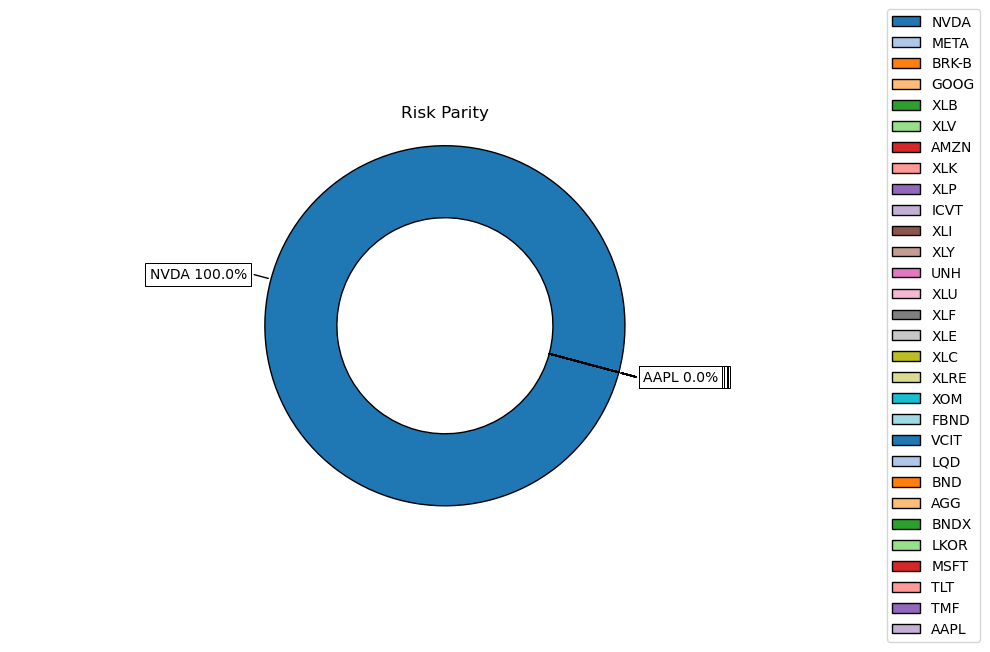

In [10]:
ax = rp.plot_pie(w=w, title='Risk Parity', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

In [ ]:
#w.to_csv(Path("w.csv"))